# Webscrapping using BeautifulSoup
#### by : Ezra Soterion Nugroho

## Introduction

We will learn on how do simple web scrapping using beautiful soup. Web scrapping is one of a method that we can use to colleting the data from internet. At this particular module, we will try to scrap the Japan foreign exchange currency rates. To do this we will only use a couple default library from python and BeautifulSoup. 

In forex, Bid and Ask is the price at which we can buy and sell a currency pair. Normally, the numbers disagree a little with the actual price of the currency, but it becomes the prices at which the currency pair is actually traded. Bid and Ask relates to forex trading and it is important to understand in learning forex in theory and practice.

## Dependencies

Actually to follow this module you only need to install beautifulsoup4 with `pip install beautifulsoup4` and you are good to go. But here some libraries that needed to be installed first that I use in this module : 

- beautifulSoup4
- pandas
- matplotlibs

## What is BeautifulSoup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. Beautiful Soup 3 only works on Python 2.x, but Beautiful Soup 4 also works on Python 3.x. Beautiful Soup 4 is faster, has more features, and works with third-party parsers
like lxml and html5lib.

Since beautifulsoup used to pull the data out of a HTML, so first we need to pull out the html first. How we do it? We will use default library `request`. 

So all this code is doing is sending a GET request to spesific address we give. This is the same type of request your browser sent to view this page, but the only difference is that Requests can't actually render the HTML, so instead you will just get the raw HTML and the other response information.

We're using the .get() function here, but Requests allows you to use other functions like .post() and .put() to send those requests as well. At this case we will going to the Bank Indonesia inflation rate page, you can click [here](https://news.mifx.com/kurs-valuta-asing?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019) to follow what exactly that link goes to. 

## Import Library

In [82]:
import requests
import matplotlib
import numpy as np
from matplotlib import style
import pandas as pd

## Data Aggregation

In [ ]:
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=01-12-2019')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [83]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [84]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. 

In [85]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

<img src="asset/Capture.png">

The information that we need are the month and the inflation rate each month, which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this. 

<img src="asset/Capture_1.png">

From inspect element we know that we need to find the line table with class `table`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get. 

In [86]:
table = soup.find('table', attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   29 November 2019
  </td>
  <td>
   129,44
  </td>
  <td>
   128,12
  </td>
 </tr>
 <tr>
  <td>
   28 November 2019
  </td>
  <td>
   129,47
  </td>
  <td>
   128,15
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 November 2019
  </td>
  <td>
   1


In [87]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>29 November 2019</td>
 <td>129,44</td>
 <td>128,12</td>
 </tr>]

As we can see, we find a right lines with information we want. I'll explain a bit about the HTML codes you need to know : 

- `th` stand for table header/header cell
- `tr` stand for table row
- `td` stand for standard cell 

That's all term in HTML `table` that you need to know. Now we can pull it one by one, but we will use looping to make our job easier. But first let's make one object that will find all `tr` in `table` to help us in looping (so we can loop with the length of the table row).

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named it `temp` and it's a tuple. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period and the inflation rate. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [88]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get dates
    date = row.find_all('td')[0].text
    date = date.strip() #for removing the excess whitespace
    
    #get ask
    ask = row.find_all('td')[1].text
    ask = ask.strip() #for removing the excess whitespace
    
    #get bid
    bid = row.find_all('td')[2].text
    bid = bid.strip() #for removing the excess whitespace
    
    temp.append((date,ask,bid)) 
    
temp 

[('29\xa0November\xa02019', '129,44', '128,12'),
 ('28\xa0November\xa02019', '129,47', '128,15'),
 ('27\xa0November\xa02019', '129,84', '128,53'),
 ('26\xa0November\xa02019', '129,82', '128,49'),
 ('25\xa0November\xa02019', '130,20', '128,89'),
 ('22\xa0November\xa02019', '130,44', '129,10'),
 ('21\xa0November\xa02019', '130,73', '129,39'),
 ('20\xa0November\xa02019', '130,56', '129,23'),
 ('19\xa0November\xa02019', '130,34', '129,03'),
 ('18\xa0November\xa02019', '130,02', '128,70'),
 ('15\xa0November\xa02019', '130,23', '128,90'),
 ('14\xa0November\xa02019', '130,34', '129,01'),
 ('13\xa0November\xa02019', '129,86', '128,53'),
 ('12\xa0November\xa02019', '129,45', '128,15'),
 ('11\xa0November\xa02019', '129,37', '128,07'),
 ('08\xa0November\xa02019', '129,03', '127,73'),
 ('07\xa0November\xa02019', '129,71', '128,41'),
 ('06\xa0November\xa02019', '128,96', '127,64'),
 ('05\xa0November\xa02019', '129,67', '128,34'),
 ('04\xa0November\xa02019', '130,04', '128,71'),
 ('01\xa0November\xa

That the result we get, At this point we can input it to a pandas' DataFrame and do usual data analysis, but if you notice the original webpage give us reversed information. To do a further analysis let's reverse our tuple we can use `::-1` to do that. 

In [89]:
temp = temp[::-1]
temp

[('02\xa0Januari\xa02019', '132,89', '131,54'),
 ('03\xa0Januari\xa02019', '135,44', '134,08'),
 ('04\xa0Januari\xa02019', '133,51', '132,17'),
 ('07\xa0Januari\xa02019', '130,86', '129,51'),
 ('08\xa0Januari\xa02019', '129,84', '128,52'),
 ('09\xa0Januari\xa02019', '130,31', '129,00'),
 ('10\xa0Januari\xa02019', '131,22', '129,88'),
 ('11\xa0Januari\xa02019', '130,62', '129,31'),
 ('14\xa0Januari\xa02019', '130,52', '129,19'),
 ('15\xa0Januari\xa02019', '130,56', '129,23'),
 ('16\xa0Januari\xa02019', '131,11', '129,75'),
 ('17\xa0Januari\xa02019', '130,61', '129,27'),
 ('18\xa0Januari\xa02019', '130,37', '129,03'),
 ('21\xa0Januari\xa02019', '130,31', '128,98'),
 ('22\xa0Januari\xa02019', '130,39', '129,07'),
 ('23\xa0Januari\xa02019', '130,05', '128,75'),
 ('24\xa0Januari\xa02019', '129,79', '128,48'),
 ('25\xa0Januari\xa02019', '129,68', '128,37'),
 ('28\xa0Januari\xa02019', '128,97', '127,65'),
 ('29\xa0Januari\xa02019', '129,74', '128,43'),
 ('30\xa0Januari\xa02019', '129,79', '12

Then after we fix our tuple a bit, as usual we will input it to pandas' dataframe.

In [90]:
df = pd.DataFrame(temp, columns = ('date','bid', 'ask'))
df.head()

,date,bid,ask
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


In [116]:
df.dtypes

date    datetime64[ns]
bid            float64
ask            float64
dtype: object

After this just usual stuff, we can clean the data or save it to csv let's do a bit cleaning so we can do a bit of visualisation. We will change the column data type into the appropriate format, so that we can do simple visualisation using matplotlib.

In [92]:
import dateparser

In [93]:
## change date data types
df['date'] = df['date'].apply(lambda x: dateparser.parse(x))

In [94]:
## converting 'ask' and 'bid' data types
df['ask'] = df['ask'].replace(',', '.', regex = True)
df['bid'] = df['bid'].replace(',', '.', regex = True)
df["ask"] = pd.to_numeric(df["ask"], errors='coerce')
df["bid"] = pd.to_numeric(df["bid"], errors='coerce')

In [95]:
df.dtypes

date    datetime64[ns]
bid            float64
ask            float64
dtype: object

In [103]:
fig = plt.figure(figsize=(5,2),dpi=300)

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

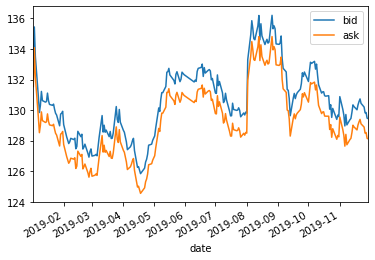

In [114]:
fig = plt.figure(figsize=(5,2),dpi=300)
df.plot(x = 'date',y = ['bid', 'ask'])

## Conclusion

In order to scrap the website we need the BeautifulSoup library which will enable us to retrieve data from the html or xml format. After that we need to find the specific element that we want in the html, by finding the specific class from the html. Once we aggregate and clean the data we can input it into 'pandas' dataframe and the plot it as we want. 

In this project we have succesfully scrap the currency foreign exchange rate from this website [here](https://news.mifx.com/kurs-valuta-asing?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019), and then create a plot based on the dates given. We can see that when we can always do the scrapping method when we don't have a direct access to a data from a website.

Thankyou!